<a href="https://colab.research.google.com/github/Maheen-Siddiqui/Colab-Projects/blob/main/StressDetectionML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import re


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Project/stressML.csv', encoding='latin1')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2838 entries, 0 to 2837
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   subreddit         2838 non-null   object 
 1   post_id           2838 non-null   object 
 2   sentence_range    2838 non-null   object 
 3   text              2838 non-null   object 
 4   id                2838 non-null   int64  
 5   label             2838 non-null   int64  
 6   confidence        2838 non-null   float64
 7   social_timestamp  2838 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 177.5+ KB
None


In [6]:
df.isnull().sum()

subreddit           0
post_id             0
sentence_range      0
text                0
id                  0
label               0
confidence          0
social_timestamp    0
dtype: int64

In [7]:
df.drop(['post_id','id','social_timestamp'],axis='columns',inplace =True)

In [14]:
df.head()

,subreddit,sentence_range,text,label,confidence
0,ptsd,"(15, 20)","He said he had not felt that way before, sugge...",1,0.8
1,assistance,"(0, 5)","Hey there r/assistance, Not sure if this is th...",0,1.0
2,ptsd,"(15, 20)",My mom then hit me with the newspaper and it s...,1,0.8
3,relationships,"[5, 10]","until i met my new boyfriend, he is amazing, h...",1,0.6
4,survivorsofabuse,"[0, 5]",October is Domestic Violence Awareness Month a...,1,0.8


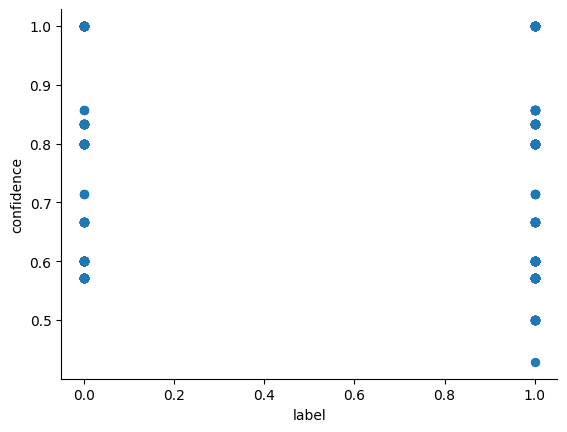

In [18]:
df.plot(kind='scatter', x='label', y='confidence', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

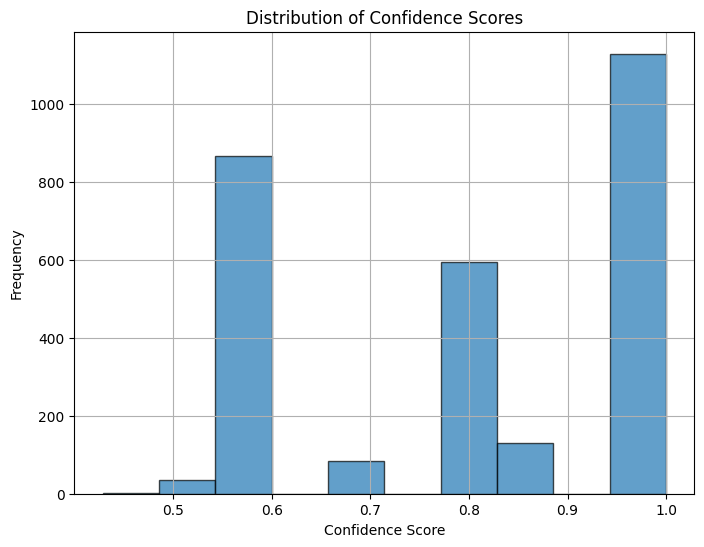

In [19]:
confidences = df.confidence
plt.figure(figsize=(8, 6))
plt.hist(confidences, bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribution of Confidence Scores')
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

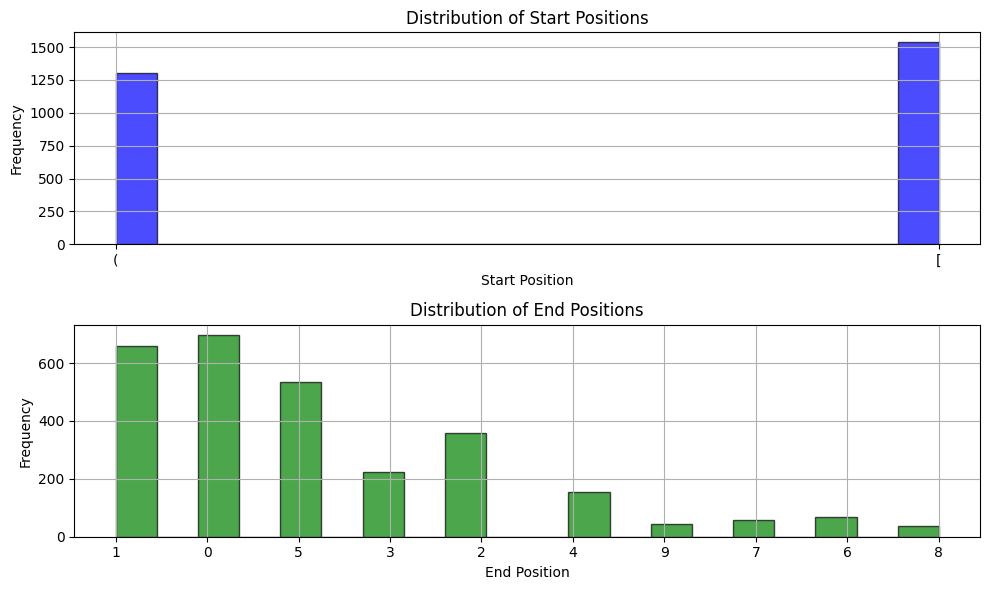

In [10]:
sentence_ranges = df.sentence_range
start_positions = [x[0] for x in sentence_ranges]
end_positions = [x[1] for x in sentence_ranges]

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.hist(start_positions, bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Start Positions')
plt.xlabel('Start Position')
plt.ylabel('Frequency')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.hist(end_positions, bins=20, color='green', edgecolor='black', alpha=0.7)
plt.title('Distribution of End Positions')
plt.xlabel('End Position')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()

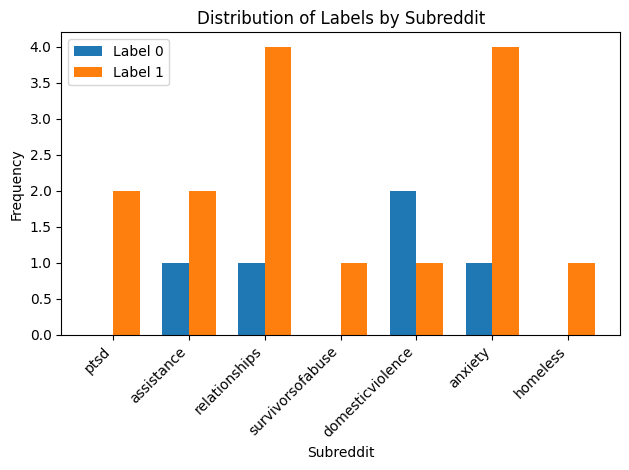

In [16]:
from collections import defaultdict

data = [
    ("ptsd", 1),
    ("assistance", 0),
    ("ptsd", 1),
    ("relationships", 1),
    ("survivorsofabuse", 1),
    ("relationships", 0),
    ("domesticviolence", 0),
    ("anxiety", 1),
    ("relationships", 1),
    ("assistance", 1),
    ("anxiety", 1),
    ("anxiety", 0),
    ("homeless", 1),
    ("anxiety", 1),
    ("relationships", 1),
    ("anxiety", 1),
    ("domesticviolence", 0),
    ("assistance", 1),
    ("relationships", 1),
    ("domesticviolence", 1)
]

subreddit_label_counts = defaultdict(lambda: defaultdict(int))
for subreddit, label in data:
    subreddit_label_counts[subreddit][label] += 1

subreddits = list(subreddit_label_counts.keys())
labels = ['Label 0', 'Label 1']
label_0_counts = [subreddit_label_counts[subreddit][0] for subreddit in subreddits]
label_1_counts = [subreddit_label_counts[subreddit][1] for subreddit in subreddits]

bar_width = 0.35
index = range(len(subreddits))

plt.bar(index, label_0_counts, bar_width, label='Label 0')
plt.bar([i + bar_width for i in index], label_1_counts, bar_width, label='Label 1')

plt.xlabel('Subreddit')
plt.ylabel('Frequency')
plt.title('Distribution of Labels by Subreddit')
plt.xticks([i + bar_width/2 for i in index], subreddits, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()